In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-csv/Titanic.csv


In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('/kaggle/input/titanic-csv/Titanic.csv')

In [22]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df_str = df[['Survived']]

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

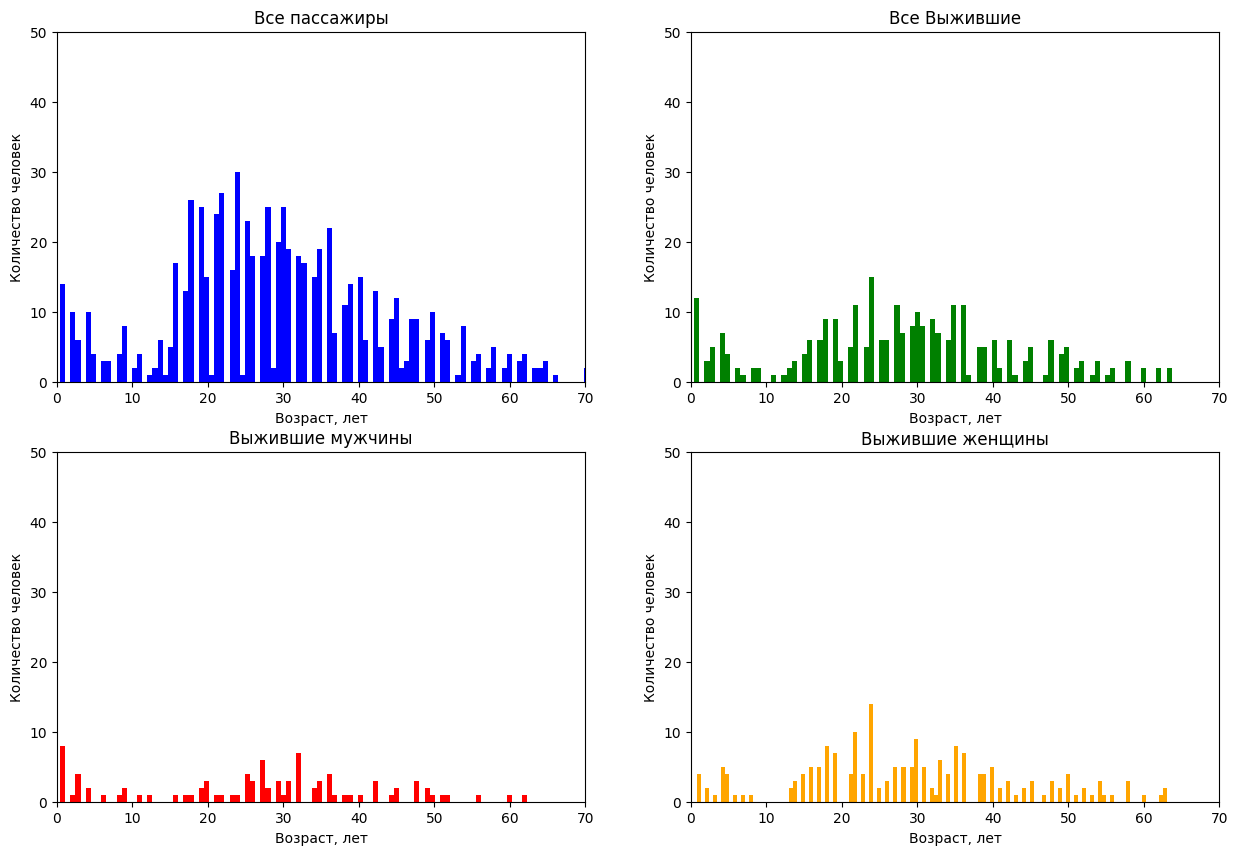

In [39]:
import matplotlib.pyplot as plt
from collections import Counter

# ... (Your existing code to create survivors, male_survivors, female_survivors) ...

# Число возрастов
num_of_ages = len(dict(Counter(survivors['Age'])).keys())

# Визуализация
fig, axs = plt.subplots(2, 2)
fig.set_figheight(10)
fig.set_figwidth(15)
names = [['Все пассажиры', 'Все Выжившие'], ['Выжившие мужчины', 'Выжившие женщины']]
colors = ['blue', 'green', 'red', 'orange'] 

for i, surv in enumerate([[df, survivors], [male_survivors, female_survivors]]):
    for j, subsurv in enumerate(surv):
        axs[i][j].hist(subsurv['Age'], bins=num_of_ages, color=colors[i*2 + j]) # Assign color
        axs[i][j].set_title(names[i][j])
        axs[i][j].set_xlabel('Возраст, лет')
        axs[i][j].set_ylabel('Количество человек')
        axs[i][j].set_ylim(0, 50)
        axs[i][j].set_xlim(0, 70)
plt.show()

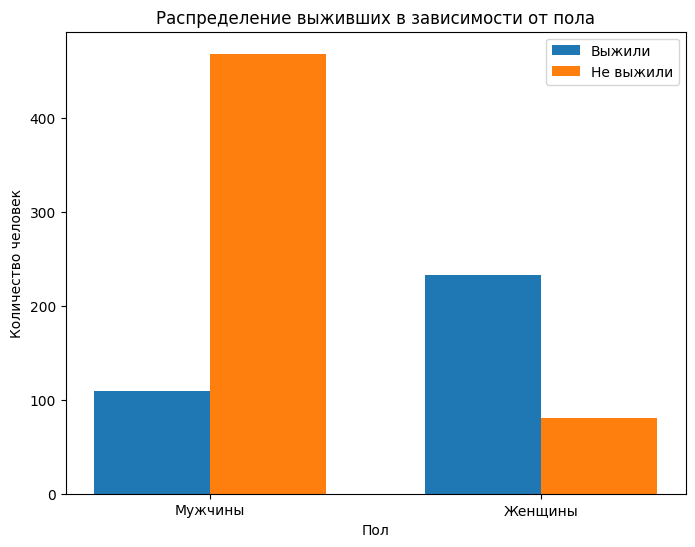

In [99]:
import numpy as np
import matplotlib.pyplot as plt

survivours_counts = {
    'Выжили': [males_survived, females_survived],
    'Не выжили': [males_total - males_survived, females_total - females_survived]
}

genders = ['Мужчины', 'Женщины']
categories = ['Выжили', 'Не выжили']

width = 0.35

x = np.arange(len(genders))

fig, ax = plt.subplots(figsize=(8, 6))

for i, category in enumerate(categories):
    ax.bar(x + i * width, survivours_counts[category], width, label=category)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(genders)
ax.set_title('Распределение выживших в зависимости от пола')
ax.set_xlabel('Пол')
ax.set_ylabel('Количество человек')
ax.legend()
plt.show()

In [111]:
# Проверка того, что детей выживает больше, чем взрослых в процентном соотношении
import numpy as np

children = df.loc[(df['Age'] < 18) & (df['Age'] > 0)]
survivors_children = df.loc[(df['Age'] < 18) & (df['Survived'] == 1) & (df['Age'] > 0)]
children_survival_rate = round(len(survivors_children) * 100 / len(children), 2)

adults = df.loc[(df['Age'] >= 18) & (df['Age'] < 50) & (df['Age'] > 0)]
survivors_adults = df.loc[(df['Age'] >= 18) & (df['Age'] < 50) & (df['Survived'] == 1)]
adults_survival_rate = round(len(survivors_adults) * 100 / len(adults), 2)

elderly = df.loc[(df['Age'] >= 50)]
survivors_elderly = df.loc[(df['Age'] >= 50) & (df['Survived'] == 1)]
elderly_survival_rate = round(len(survivors_elderly) * 100 / len(elderly), 2)

print("+" + "-"*40 + "+")
print("| {:<20} | {:>15} |".format("Категория", "Выживаемость (%)"))
print("+" + "-"*40 + "+")
print("| {:<20} | {:>15} |".format("Дети (до 18 лет)", children_survival_rate))
print("| {:<20} | {:>15} |".format("Взрослые (18-50 лет)", adults_survival_rate))
print("| {:<20} | {:>15} |".format("Пожилые (50+)", elderly_survival_rate))
print("+" + "-"*40 + "+")

+----------------------------------------+
| Категория            | Выживаемость (%) |
+----------------------------------------+
| Дети (до 18 лет)     |           53.98 |
| Взрослые (18-50 лет) |           36.08 |
| Пожилые (50+)        |           36.49 |
+----------------------------------------+


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [47]:
categorical_cols = df.select_dtypes(include=['object']).columns # выбираем все элементы с типом данных object
label_encoders = {}

In [49]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

In [112]:
df['Age'] = df['Age'].fillna(df['Age'].median()) ## заполняем пропуски медианным значением

1 модель

In [113]:
x = df.drop(columns=['Survived']) # Not target выкинули колонку survived
y = df['Survived'] # Target

In [118]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Выделяем 0.2 на обучение, 0,8 на тестирование

# Standartize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Слой бывают свёрточные (машинное зрение), полносвязные , рекуентные(задачи LMP)
# 
#Create a neural network model Dense - полносвязные слой => полносвязная нейросеть 
model = Sequential() # последовательная 
model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],))) # 1 Слой(входной) 32 - кол-во нейронов не меньще чем колонок 
#relu - функция активации, входной размер

model.add(Dense(16, activation='relu'))# 2 слой (скрытый)
model.add(Dense(1, activation='sigmoid'))# 3 слой (выходной)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Компиляция, оптимизатор - адам(оптимизируем ошибку), 
#loss - функция потерь - бинарная кроссэнтропия, метрика accuracy берёт процент (не подходит для моделей дисбаланса класса)

#Train the model
history1 = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.5) # epochs - эпохи, итерации

#Evaluate the model оценка модели
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy: .2f}')

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4965 - loss: 0.7081 - val_accuracy: 0.6039 - val_loss: 0.6657
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6610 - loss: 0.6291 - val_accuracy: 0.7191 - val_loss: 0.6136
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7461 - loss: 0.5730 - val_accuracy: 0.7444 - val_loss: 0.5770
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7313 - loss: 0.5530 - val_accuracy: 0.7500 - val_loss: 0.5492
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8050 - loss: 0.5036 - val_accuracy: 0.7556 - val_loss: 0.5288
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7987 - loss: 0.4864 - val_accuracy: 0.7669 - val_loss: 0.5102
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7652 - loss: 0.4990 - val_accuracy: 0.7809 - val_loss: 0.4976
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8067 - loss: 0.4520 - val_accuracy: 0.7837 - val_loss: 0.4865
Ep

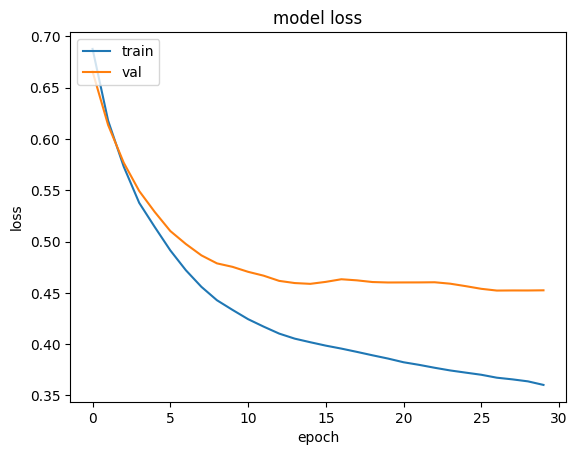

In [119]:
plt.plot(history1.history['loss'])# загрузка данных в сюжет
plt.plot(history1.history['val_loss'])# загрузка данных в сюжет
plt.title('model loss') # заголовок
plt.ylabel('loss')#название игрек оси
plt.xlabel('epoch')#название икс оси
plt.legend(['train', 'val'], loc='upper left')

2 модель

In [56]:
x = df[['Age', 'Sex', 'Pclass']]

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4899 - loss: 0.6856 - val_accuracy: 0.7754 - val_loss: 0.6186
Epoch 2/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7862 - loss: 0.5959 - val_accuracy: 0.8075 - val_loss: 0.5327
Epoch 3/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7913 - loss: 0.5135 - val_accuracy: 0.7914 - val_loss: 0.4674
Epoch 4/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.4624 - val_accuracy: 0.7701 - val_loss: 0.4429
Epoch 5/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7690 - loss: 0.4631 - val_accuracy: 0.7754 - val_loss: 0.4330
Epoch 6/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7842 - loss: 0.4828 - val_accuracy: 0.7754 - val_loss: 0.4284
Epoch 7/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7903 - loss: 0.4466 - val_accuracy: 0.7807 - val_loss: 0.4237
Epoch 8/25
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.4197 - val_accuracy: 0.7754 - val_loss: 0.4207
Epo

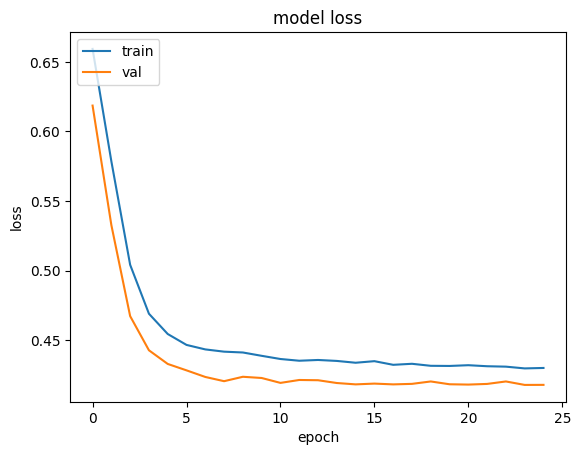

In [57]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.3, random_state=42) # Выделяем 0.2 на обучение, 0,8 на тестирование

# Standartize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Слой бывают свёрточные (машинное зрение), полносвязные , рекуентные(задачи LMP)
# 
#Create a neural network model Dense - полносвязные слой => полносвязная нейросеть 
model = Sequential() # последовательная 

model.add(Dense(32, activation='relu', input_shape=(x_train.shape[1],))) # 1 Слой(входной) 32 - кол-во нейронов не меньще чем колонок 
#relu - функция активации, входной размер
model.add(Dense(16, activation='relu'))# 2 слой (скрытый)
model.add(Dense(1, activation='sigmoid'))# 3 слой (выходной)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Компиляция, оптимизатор - адам(оптимизируем ошибку), 
#loss - функция потерь - бинарная кроссэнтропия, метрика accuracy берёт процент (не подходит для моделей дисбаланса класса)

#Train the model
history1 = model.fit(x_train, y_train, epochs=25, batch_size=10, validation_split=0.3) # epochs - эпохи, итерации

#Evaluate the model оценка модели
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy: .2f}')


import matplotlib.pyplot as plt
%matplotlib inline 
##history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.5) # набор данных для построемния графика объект
plt.plot(history1.history['loss'])# загрузка данных в сюжет
plt.plot(history1.history['val_loss'])# загрузка данных в сюжет
plt.title('model loss') # заголовок
plt.ylabel('loss')#название игрек оси
plt.xlabel('epoch')#название икс оси
plt.legend(['train', 'val'], loc='upper left')#легенда графика приклепление данных
plt.show()# показать график

In [58]:
x = df[['Sex', 'Age', 'Pclass']]

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6776 - loss: 0.6328 - val_accuracy: 0.7902 - val_loss: 0.4721
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7982 - loss: 0.4905 - val_accuracy: 0.8042 - val_loss: 0.4511
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8047 - loss: 0.4785 - val_accuracy: 0.8042 - val_loss: 0.4412
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7997 - loss: 0.4499 - val_accuracy: 0.7692 - val_loss: 0.4596
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7935 - loss: 0.4784 - val_accuracy: 0.8112 - val_loss: 0.4413
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8028 - loss: 0.4793 - val_accuracy: 0.7972 - val_loss: 0.4572
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7779 - loss: 0.4423 - val_accuracy: 0.8042 - val_loss: 0.4504
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8210 - loss: 0.4480 - val_accuracy: 0.7902 - val_loss: 0.4516
Ep

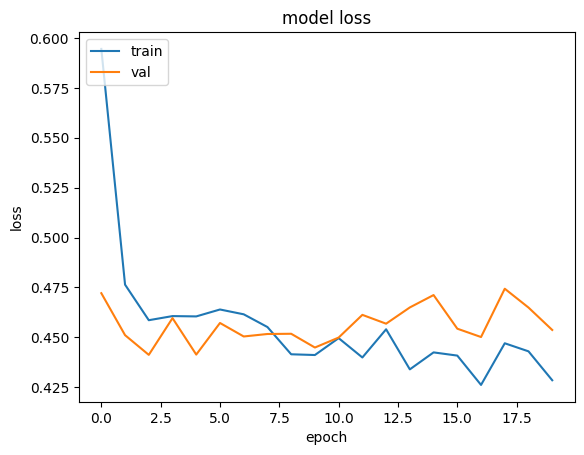

In [59]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.optimizers import *
from keras.models import Sequential
from keras.layers import Dense,Dropout

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=100) # Выделяем 0.2 на обучение, 0,8 на тестирование

# Standartize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Слой бывают свёрточные (машинное зрение), полносвязные , рекуентные(задачи LMP)
# 
#Create a neural network model Dense - полносвязные слой => полносвязная нейросеть 
model = Sequential() # последовательная 

model.add(Dense(512, activation='leaky_relu', input_shape=(x_train.shape[1],))) # 1 Слой(входной) 32 - кол-во нейронов не меньще чем колонок 
#relu - функция активации, входной размер
model.add(Dense(256, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='leaky_relu'))# 2 слой (скрытый)
model.add(Dropout(0.2))
model.add(Dense(16, activation='leaky_relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='silu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))# 3 слой (выходной)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Компиляция, оптимизатор - адам(оптимизируем ошибку), 
#loss - функция потерь - бинарная кроссэнтропия, метрика accuracy берёт процент (не подходит для моделей дисбаланса класса)

#Train the model
epochs = 20
history2 = model.fit(x_train, y_train, epochs=epochs, batch_size=20, validation_split=0.2) # epochs - эпохи, итерации

#Evaluate the model оценка модели
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy: .2f}')


import matplotlib.pyplot as plt
%matplotlib inline 
##history = model.fit(x_train, y_train, epochs=30, batch_size=10, validation_split=0.5) # набор данных для построемния графика объект
plt.plot(history2.history['loss'])# загрузка данных в сюжет
plt.plot(history2.history['val_loss'])# загрузка данных в сюжет
plt.title('model loss') # заголовок
plt.ylabel('loss')#название игрек оси
plt.xlabel('epoch')#название икс оси
plt.legend(['train', 'val'], loc='upper left')#легенда графика приклепление данных
plt.show()# показать график

In [65]:
x = df[['Sex', 'Age', 'Pclass']]

5 модель

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7092 - loss: 0.6087 - val_accuracy: 0.7902 - val_loss: 0.4932
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7759 - loss: 0.5007 - val_accuracy: 0.8042 - val_loss: 0.4513
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7702 - loss: 0.4689 - val_accuracy: 0.8042 - val_loss: 0.4395
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4252 - val_accuracy: 0.8182 - val_loss: 0.4319
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8006 - loss: 0.4206 - val_accuracy: 0.8042 - val_loss: 0.4384
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4460 - val_accuracy: 0.8182 - val_loss: 0.4210
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7833 - loss: 0.4698 - val_accuracy: 0.8042 - val_loss: 0.4293
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4199 - val_accuracy: 0.8112 - val_loss: 0.4186
Epo

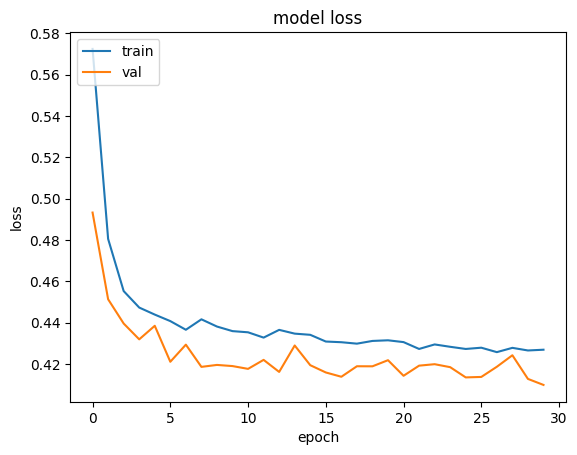

In [66]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.optimizers import *
from keras.models import Sequential
from keras.layers import Dense,Dropout

#train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=20) # Выделяем 0.2 на обучение, 0,8 на тестирование

# Standartize the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
# Слой бывают свёрточные (машинное зрение), полносвязные , рекуентные(задачи LMP)
# 
#Create a neural network model Dense - полносвязные слой => полносвязная нейросеть 
model = Sequential() # последовательная 

model.add(Dense(128, activation='leaky_relu', input_shape=(x_train.shape[1],))) # 1 Слой(входной) 32 - кол-во нейронов не меньще чем колонок 
#relu - функция активации, входной размер
model.add(Dense(32, activation='leaky_relu'))

model.add(Dense(8, activation='leaky_relu'))

model.add(Dense(1, activation='sigmoid'))# 3 слой (выходной)

#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Компиляция, оптимизатор - адам(оптимизируем ошибку), 
#loss - функция потерь - бинарная кроссэнтропия, метрика accuracy берёт процент (не подходит для моделей дисбаланса класса)

#Train the model
epochs = 30
history2 = model.fit(x_train, y_train, epochs=epochs, batch_size=10, validation_split=0.2) # epochs - эпохи, итерации

#Evaluate the model оценка модели
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy: .2f}')


import matplotlib.pyplot as plt
%matplotlib inline 
##history = model.fit(x_train, y_train, epochs=30, batch_size=10, validation_split=0.5) # набор данных для построемния графика объект
plt.plot(history2.history['loss'])# загрузка данных в сюжет
plt.plot(history2.history['val_loss'])# загрузка данных в сюжет
plt.title('model loss') # заголовок
plt.ylabel('loss')#название игрек оси
plt.xlabel('epoch')#название икс оси
plt.legend(['train', 'val'], loc='upper left')#легенда графика приклепление данных
plt.show()# показать график

/tmp/ipykernel_24/1128703286.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'], hist=True, kde=False,
/tmp/ipykernel_24/1128703286.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survivors['Fare'], hist=True, kde=False,


<Axes: title={'center': 'Распределение по стоимости билетов'}, xlabel='Fare', ylabel='Кол-во человек'>

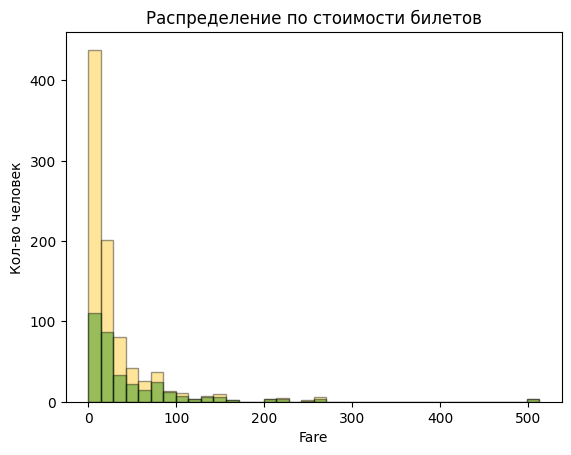

In [61]:
from collections import Counter

#Распределение списка пассажиров по Цене билета
survivors = df.loc[(df['Survived'] == 1)]

import seaborn as sns

sns.distplot(df['Fare'], hist=True, kde=False, 
             bins=int(180/5), color = '#ffbe00',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение по стоимости билетов')
plt.xlabel('Цена')
plt.ylabel('Кол-во человек')


sns.distplot(survivors['Fare'], hist=True, kde=False, 
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'})

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
# Функция для матрицы ошибок
def draw_confusion_matrix(true,preds):
    conf_matx = confusion_matrix(true, preds)
    sns.heatmap(conf_matx, annot=True,annot_kws={"size": 12},fmt='g', cbar=False, cmap="viridis")
    plt.show()

SyntaxError: incomplete input (3331099769.py, line 5)

In [71]:
#ковертирует предсказания в лейблы
def prep_submissions(preds_array, file_name='titanic.csv'):
    preds_df = pd.DataFrame(preds_array)
    predicted_labels = preds_df.idxmax(axis=1) 
    return predicted_labels

In [72]:
x = df[['Sex', 'Age', 'Pclass', 'Fare']]

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5443 - loss: 0.6985 - val_accuracy: 0.6503 - val_loss: 0.6508
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7398 - loss: 0.6348 - val_accuracy: 0.7133 - val_loss: 0.5969
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7930 - loss: 0.5760 - val_accuracy: 0.7692 - val_loss: 0.5489
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.5354 - val_accuracy: 0.7762 - val_loss: 0.5102
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7795 - loss: 0.5143 - val_accuracy: 0.7832 - val_loss: 0.4864
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7660 - loss: 0.4764 - val_accuracy: 0.7902 - val_loss: 0.4698
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7400 - loss: 0.5160 - val_accuracy: 0.7902 - val_loss: 0.4593
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.4584 - val_accuracy: 0.7902 - val_loss: 0.4532
Epo

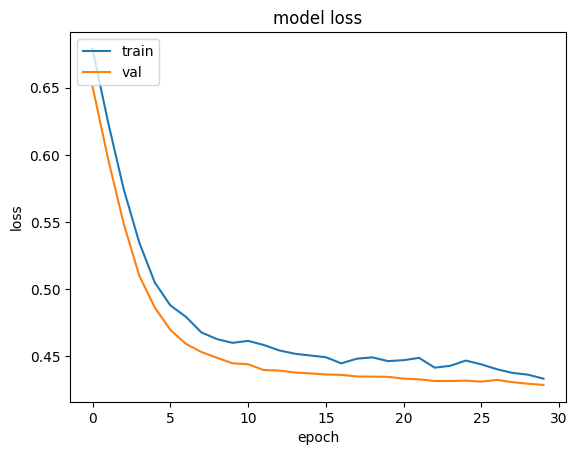

In [74]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.optimizers import *
from keras.models import Sequential
from keras.layers import Dense,Dropout




x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=20) # Выделяем 0.2 на обучение




scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


model = Sequential() # последовательная 

model.add(Dense(128, activation='leaky_relu', input_shape=(x_train.shape[1],))) # 1 Слой(входной) 32 - кол-во нейронов не меньще чем колонок 
model.add(Dropout(0.01))
model.add(Dense(32, activation='leaky_relu',))
model.add(Dropout(0.025))
model.add(Dense(8, activation='leaky_relu'))
model.add(Dropout(0.05))
model.add(Dense(1, activation='sigmoid'))


opt = Adam(learning_rate = 0.00015)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) # Компиляция, оптимизатор - адам(оптимизируем ошибку), 
    
    
    


epochs = 30
history2 = model.fit(x_train, y_train, epochs=epochs, batch_size=10, validation_split=0.2) # epochs - эпохи, итерации












loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy: .2f}')




# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(history2.history['loss'])# загрузка данных в сюжет
plt.plot(history2.history['val_loss'])# загрузка данных в сюжет
plt.title('model loss') # заголовок
plt.ylabel('loss')#название игрек оси
plt.xlabel('epoch')#название икс оси
plt.legend(['train', 'val'], loc='upper left')#легенда графика приклепление данных
plt.show()# показать график

Cross-validation with K

In [76]:
def fit_and_evaluate(x_train, val_x, y_train, val_y, params):
    model = None
    
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    val_x = scaler.transform(val_x)

    #Create a neural network model Dense 
    model = Sequential() # последовательная 

    model.add(Dense(128, activation='leaky_relu', input_shape=(x_train.shape[1],))) # 1 Слой(входной) 32 - кол-во нейронов не меньще чем колонок 
    model.add(Dropout(0.01))
    model.add(Dense(32, activation='leaky_relu',))
    model.add(Dropout(0.025))
    model.add(Dense(8, activation='leaky_relu'))
    model.add(Dropout(0.05))
    model.add(Dense(1, activation='sigmoid'))

    #Compile the model
    opt = Adam(learning_rate = 0.00015)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) # Компиляция, оптимизатор - адам(оптимизируем ошибку), 
    #loss - функция потерь - бинарная кроссэнтропия, метрика accuracy берёт процент (не подходит для моделей дисбаланса класса)
    
    
    
    results = model.fit(x_train, y_train, epochs=30, batch_size=10, validation_split=0.2)
    print("Val Score: ",model.evaluate(val_x, val_y))
    params.append(model.evaluate(val_x, val_y))
    return results

In [77]:
n_folds = 10
x_train, x_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=20)
model_history = []
params = []
random = []
import numpy as np
for i in range(n_folds):
    print("Training on Fold: ",i+1)
    random_state = np.random.randint(1,1000, 1)[0]
    t_x, val_x, t_y, val_y = train_test_split(x_train,y_train, test_size=0.1, 
                                              random_state = np.random.randint(1,1000, 1)[0])
    random.append(random_state)
    model_history.append(fit_and_evaluate(t_x, val_x, t_y, val_y, params))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5868 - loss: 0.6763 - val_accuracy: 0.7656 - val_loss: 0.6062
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7247 - loss: 0.6014 - val_accuracy: 0.7734 - val_loss: 0.5656
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7410 - loss: 0.5793 - val_accuracy: 0.7734 - val_loss: 0.5448
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7469 - loss: 0.5623 - val_accuracy: 0.7656 - val_loss: 0.5298
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.5309 - val_accuracy: 0.7734 - val_loss: 0.5187
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7843 - loss: 0.5179 - val_accuracy: 0.7734 - val_loss: 0.5104
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7548 - loss: 0.5598 - val_accuracy: 0.7812 - val_loss: 0.5035
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7491 - loss: 0.5242 - val_accuracy: 0.7734 - val_loss: 0.4987
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6924 - loss: 0.6582 - val_accuracy: 0.7266 - val_loss: 0.6303
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.5843 - val_accuracy: 0.7422 - val_loss: 0.5960
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.5466 - val_accuracy: 0.7578 - val_loss: 0.5701
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7553 - loss: 0.5233 - val_accuracy: 0.7344 - val_loss: 0.5521
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7952 - loss: 0.4920 - val_accuracy: 0.7500 - val_loss: 0.5385
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7616 - loss: 0.4885 - val_accuracy: 0.7656 - val_loss: 0.5313
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7995 - loss: 0.4485 - val_accuracy: 0.7656 - val_loss: 0.5282
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4297 - val_accuracy: 0.7656 - val_loss: 0.5263
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6468 - loss: 0.6688 - val_accuracy: 0.7578 - val_loss: 0.6327
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 0.6292 - val_accuracy: 0.7656 - val_loss: 0.6041
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.6012 - val_accuracy: 0.7656 - val_loss: 0.5740
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8176 - loss: 0.5433 - val_accuracy: 0.7656 - val_loss: 0.5431
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7486 - loss: 0.5349 - val_accuracy: 0.7578 - val_loss: 0.5206
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7683 - loss: 0.5221 - val_accuracy: 0.7578 - val_loss: 0.5066
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7767 - loss: 0.4882 - val_accuracy: 0.7656 - val_loss: 0.4954
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7495 - loss: 0.5129 - val_accuracy: 0.7656 - val_loss: 0.4894
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5141 - loss: 0.6977 - val_accuracy: 0.7266 - val_loss: 0.6779
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7308 - loss: 0.6668 - val_accuracy: 0.7656 - val_loss: 0.6371
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7281 - loss: 0.6369 - val_accuracy: 0.7812 - val_loss: 0.5971
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7495 - loss: 0.5983 - val_accuracy: 0.8125 - val_loss: 0.5590
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7303 - loss: 0.5741 - val_accuracy: 0.8203 - val_loss: 0.5228
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8099 - loss: 0.5020 - val_accuracy: 0.8203 - val_loss: 0.4915
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7743 - loss: 0.5098 - val_accuracy: 0.8047 - val_loss: 0.4737
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7998 - loss: 0.4947 - val_accuracy: 0.8047 - val_loss: 0.4618
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6653 - loss: 0.6684 - val_accuracy: 0.7656 - val_loss: 0.6236
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7714 - loss: 0.6173 - val_accuracy: 0.7656 - val_loss: 0.5785
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7520 - loss: 0.5846 - val_accuracy: 0.7734 - val_loss: 0.5414
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7795 - loss: 0.5300 - val_accuracy: 0.7734 - val_loss: 0.5135
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 0.5288 - val_accuracy: 0.7734 - val_loss: 0.4917
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7766 - loss: 0.4933 - val_accuracy: 0.7734 - val_loss: 0.4782
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7707 - loss: 0.5111 - val_accuracy: 0.7734 - val_loss: 0.4671
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8009 - loss: 0.4725 - val_accuracy: 0.7734 - val_loss: 0.4564
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4168 - loss: 0.7129 - val_accuracy: 0.6641 - val_loss: 0.6636
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7028 - loss: 0.6500 - val_accuracy: 0.7500 - val_loss: 0.6129
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7698 - loss: 0.6019 - val_accuracy: 0.7500 - val_loss: 0.5709
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7896 - loss: 0.5533 - val_accuracy: 0.7500 - val_loss: 0.5422
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 0.5263 - val_accuracy: 0.7500 - val_loss: 0.5251
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7700 - loss: 0.5072 - val_accuracy: 0.7500 - val_loss: 0.5156
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.4917 - val_accuracy: 0.7500 - val_loss: 0.5091
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8241 - loss: 0.4463 - val_accuracy: 0.7500 - val_loss: 0.5101
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3783 - loss: 0.7034 - val_accuracy: 0.6328 - val_loss: 0.6709
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6944 - loss: 0.6659 - val_accuracy: 0.7734 - val_loss: 0.6125
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7649 - loss: 0.6076 - val_accuracy: 0.7812 - val_loss: 0.5635
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.5672 - val_accuracy: 0.7812 - val_loss: 0.5241
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7828 - loss: 0.5340 - val_accuracy: 0.7891 - val_loss: 0.4933
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 0.5253 - val_accuracy: 0.7812 - val_loss: 0.4773
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7402 - loss: 0.5285 - val_accuracy: 0.7891 - val_loss: 0.4623
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7645 - loss: 0.4958 - val_accuracy: 0.7891 - val_loss: 0.4548
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7009 - loss: 0.6607 - val_accuracy: 0.8359 - val_loss: 0.6041
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7444 - loss: 0.6209 - val_accuracy: 0.8359 - val_loss: 0.5462
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7632 - loss: 0.5674 - val_accuracy: 0.8438 - val_loss: 0.4936
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7763 - loss: 0.5277 - val_accuracy: 0.8359 - val_loss: 0.4567
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.5303 - val_accuracy: 0.8438 - val_loss: 0.4309
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7560 - loss: 0.5128 - val_accuracy: 0.8438 - val_loss: 0.4124
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7689 - loss: 0.4771 - val_accuracy: 0.8516 - val_loss: 0.4013
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7986 - loss: 0.4368 - val_accuracy: 0.8516 - val_loss: 0.3921
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4519 - loss: 0.6954 - val_accuracy: 0.7656 - val_loss: 0.6602
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7424 - loss: 0.6591 - val_accuracy: 0.8203 - val_loss: 0.6226
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7895 - loss: 0.6187 - val_accuracy: 0.8203 - val_loss: 0.5857
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7335 - loss: 0.5973 - val_accuracy: 0.8125 - val_loss: 0.5524
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7635 - loss: 0.5643 - val_accuracy: 0.8047 - val_loss: 0.5207
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7590 - loss: 0.5319 - val_accuracy: 0.8047 - val_loss: 0.4948
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7518 - loss: 0.5210 - val_accuracy: 0.8047 - val_loss: 0.4772
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7655 - loss: 0.5127 - val_accuracy: 0.7969 - val_loss: 0.4628
Epo

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6877 - loss: 0.6802 - val_accuracy: 0.7422 - val_loss: 0.6495
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7685 - loss: 0.6312 - val_accuracy: 0.7188 - val_loss: 0.6184
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8153 - loss: 0.5785 - val_accuracy: 0.7188 - val_loss: 0.5901
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8010 - loss: 0.5351 - val_accuracy: 0.7188 - val_loss: 0.5683
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7661 - loss: 0.5252 - val_accuracy: 0.7188 - val_loss: 0.5525
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7838 - loss: 0.4914 - val_accuracy: 0.7266 - val_loss: 0.5447
Epoch 7/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7931 - loss: 0.4619 - val_accuracy: 0.7266 - val_loss: 0.5411
Epoch 8/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8024 - loss: 0.4262 - val_accuracy: 0.7344 - val_loss: 0.5404
Epo

In [80]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,125 (59.09 KB)

 Trainable params: 5,041 (19.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,084 (39.39 KB)

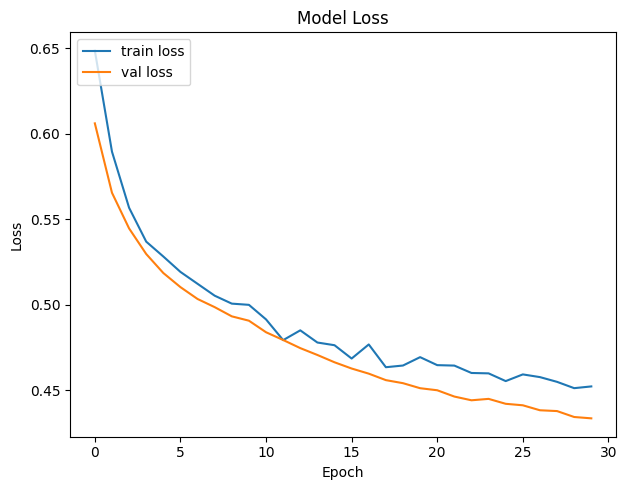

In [133]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')


plt.tight_layout()
plt.show()

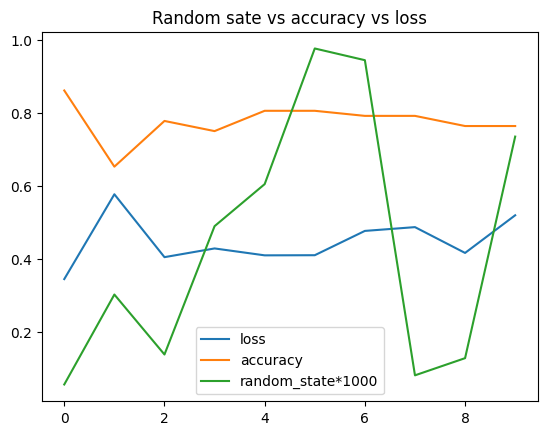

In [120]:
plt.title('Random sate vs accuracy vs loss')
random1000=[]
for i in range(len(random)):
    random1000.append(random[i]/1000)
plt.plot(params, label=('loss', 'accuracy'))
plt.plot(random1000, label=('random_state*1000'))
plt.legend()
plt.show()